# Bolt Detector
mod for detecting bolt




## Imports

In [ ]:
!pip install -U --pre tensorflow=="2.2.0"

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
!unrar x '/content/selected_image_10.rar' # "/content/bolt"

# Helper Function 
 Helper Function for Download Picture and Visualize


In [ ]:
def load_image_into_numpy_array(path):
  
   """Load an image from file into a numpy array.

   Puts image into numpy array to feed into tensorflow graph.
   Note that by convention we put it into a numpy array with shape
   (height, width, channels), where channels=3 for RGB.

   Args:
    path: a file path.

   Returns:
     uint8 numpy array with shape (img_height, img_width, 3)
   """
   img_data = tf.io.gfile.GFile(path, 'rb').read()

   image = Image.open(BytesIO(img_data))

   (im_width, im_height) = image.size

   return np.array(image.getdata()).reshape(
       (im_height, im_width, 3)).astype(np.uint8)

def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
   """Wrapper function to visualize detections.

   Args:
     image_np: uint8 numpy array with shape (img_height, img_width, 3)
     boxes: a numpy array of shape [N, 4]
     classes: a numpy array of shape [N]. Note that class indices are 1-based,
       and match the keys in the label map.
     scores: a numpy array of shape [N] or None.  If scores=None, then
       this function assumes that the boxes to be plotted are groundtruth
       boxes and plot all boxes as black with no classes or scores.
     category_index: a dict containing category dictionaries (each holding
       category index `id` and category name `name`) keyed by category indices.
     figsize: size for the figure.
     image_name: a name for the image file.
   """
  
   image_np_with_annotations = image_np.copy()

   viz_utils.visualize_boxes_and_labels_on_image_array(
       
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  
   if image_name:
     plt.imsave(image_name, image_np_with_annotations)
   else:
     plt.imshow(image_np_with_annotations)


In [ ]:
image_dir = '/content/selected_image_10'

# number of pictur 
picturesList = sorted(os.listdir(image_dir)) # dir is your directory path
number_pictures = len(picturesList)
print(number_pictures )
print(picturesList)


In [ ]:
picturesList[0]




#  data



In [ ]:
# Load images and visualize
train_image_dir = '/content/selected_image_10'

train_images_np = []

for img in picturesList[:7] :# range(number_picture):
  # image_path = os.path.join(train_image_dir, 'robe' + str(i) + '.jpg')
    image_path = os.path.join(train_image_dir, img)
    print(f"image is : {img}")  
    train_images_np.append(load_image_into_numpy_array(image_path))

#print(image_path)

In [ ]:
len(train_images_np)

7

In [ ]:
bolt_pos_path = '/content/result10.txt'

box=[]
#counter=0
c=[]

with open(bolt_pos_path ,'r') as f:
    while True:
       line= f.readline()
       select=line[:11]
       if select in picturesList[:30] :
          b= line[11:].split()
          for x in b:
            x= x[:-2]
            c.append(x)
       
          box.append(c)
         # counter += 1
          c=[]
       
       if not line :
          break


string_to_number_list = []
gt_boxes_first = []

for bolt_pos in box: 
    for string in bolt_pos:
        string_to_number = list( np.fromstring(string, sep=',') )
        string_to_number_list.append(string_to_number )

    #gt_boxes_first.append(string_to_number)
   # gt_boxes_first.append( np.array(string_to_number,dtype=np.float32).reshape(1,4) )

    gt_boxes_first.append( np.array(string_to_number_list,dtype=np.float32) )# *0.001 )#.reshape(1,4) )
    string_to_number_list = []  

 
L_change=[]
gt_boxes=[]
mid=[]

for ar in gt_boxes_first :
   for item in ar :
      for i in range (4):
         if i% 2== 0:
            L_change.append(item[i+1]/train_images_np[0].shape[0])
         else:
            L_change.append(item[i-1]/train_images_np[0].shape[1])
      mid.append(L_change) 
      L_change=[]            
   gt_boxes.append(np.array(mid) ) 
   mid=[] 

In [ ]:
#print(gt_boxes_first[0] )
print(gt_boxes[0])


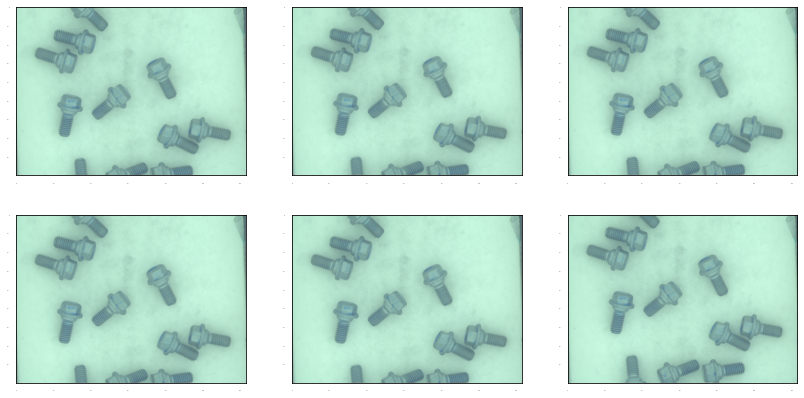

In [ ]:
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = False
plt.rcParams['ytick.labelsize'] = False
plt.rcParams['xtick.top'] = False
plt.rcParams['xtick.bottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.right'] = False
plt.rcParams['figure.figsize'] = [14, 7]

#plt.imshow(train_images_np[5])

for idx, train_image_np in enumerate(train_images_np[:6]):
  plt.subplot(2,3, idx+1)
  plt.imshow(train_image_np)
plt.show()


In [ ]:
train_image_np.shape

(900, 1229, 3)

# Annotate images 







In [ ]:
#gt_boxes = []
#colab_utils.annotate(train_images_np, box_storage_pointer=gt_boxes)

# Prepare data for training



In [ ]:

bolt_class_id = 1
num_classes = 1

category_index = {bolt_class_id: {'id': bolt_class_id, 'name': 'bolt'}}


label_id_offset = 1
train_image_tensors = []
gt_classes_one_hot_tensors = []
gt_box_tensors = []

for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):

   train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
                              train_image_np, dtype=tf.float32), axis=0))
   
   gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))

   zero_indexed_groundtruth_classes = tf.convert_to_tensor(
                              np.ones(shape=[gt_box_np.shape[0]], dtype=np.int32) - label_id_offset)
   
   gt_classes_one_hot_tensors.append(tf.one_hot(
                              zero_indexed_groundtruth_classes, num_classes))
   
print('Done prepping data.')


Done prepping data.


# visualize thepicture andd their bounding box


In [ ]:
dummy_scores = np.array([1,1,1,1,1,1,1,1,1,1,1], dtype=np.float32)  # give boxes a score of 100%

plt.figure(figsize=(30, 15))

for idx in range(5):
  plt.subplot(2, 3, idx+1)
  plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.ones(shape=[gt_boxes[idx].shape[0]], dtype=np.int32),
      dummy_scores, category_index)
  
plt.show()

# Create model and restore weights for all but last layer


In [ ]:
# Download the checkpoint and put it into models/research/object_detection/test_data/

!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

In [ ]:
tf.keras.backend.clear_session()

print('Building model and restoring weights for fine-tuning...', flush=True)
num_classes = 1
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Load pipeline config and build a detection model.

configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
model_config.ssd.num_classes = num_classes
model_config.ssd.freeze_batchnorm = True
detection_model = model_builder.build(
      model_config=model_config, is_training=True)


fake_box_predictor = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    #    (i.e., the classification head that we *will not* restore)
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
fake_model = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=fake_box_predictor)
ckpt = tf.compat.v2.train.Checkpoint(model=fake_model)
ckpt.restore(checkpoint_path).expect_partial()

# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)
print('Weights restored!')

Building model and restoring weights for fine-tuning...
Weights restored!


# Eager mode custom training loop



In [ ]:
tf.keras.backend.set_learning_phase(True)

# These parameters can be tuned
batch_size =4
learning_rate = 0.01
num_batches = 30

# Select variables in top layers to fine-tune.
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
  """Get a tf.function for training step."""

  
  @tf.function
  def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
    """A single training iteration.

    Args:
      image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """
    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)

    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)
    
    with tf.GradientTape() as tape:
      preprocessed_images = tf.concat(
          [detection_model.preprocess(image_tensor)[0]
           for image_tensor in image_tensors], axis=0)
      
      prediction_dict = model.predict(preprocessed_images, shapes)

      losses_dict = model.loss(prediction_dict, shapes)

      total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']

      gradients = tape.gradient(total_loss, vars_to_fine_tune)

      optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))

    return total_loss

  return train_step_fn

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

train_step_fn = get_model_train_step_function(
                        detection_model, optimizer, to_fine_tune)

print('Start fine-tuning!', flush=True)
for idx in range(num_batches):
  # Grab keys for a random subset of examples
  all_keys = list(range(len(train_images_np)))
  random.shuffle(all_keys)
  example_keys = all_keys[:batch_size]


  gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
  gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
  image_tensors = [train_image_tensors[key] for key in example_keys]

  # Training step (forward pass + backwards pass)
  total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)

  if idx % 10 == 0:
    print('batch ' + str(idx) + ' of ' + str(num_batches)
    + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!


/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


batch 0 of 30, loss=1.7411354


batch 10 of 30, loss=0.70194733
batch 20 of 30, loss=0.3201589
Done fine-tuning!


# Load test images and run inference with new model!

In [ ]:
#test_image_dir = 'models/research/object_detection/test_images/ducky/test/'

test_image_dir= '/content/selected_image_10'

test_images_np = []

for img in picturesList[10:18]:

  # image_path = os.path.join(train_image_dir, 'robertducky' + str(i) + '.jpg')
    image_path = os.path.join(test_image_dir, img)
     
    test_images_np.append(np.expand_dims(
                          load_image_into_numpy_array(image_path), axis=0) )

"""
test_images_np = []
for i in range(1, 50):
  image_path = os.path.join(test_image_dir, 'out' + str(i) + '.jpg')
  test_images_np.append(np.expand_dims(
      load_image_into_numpy_array(image_path), axis=0))
"""


@tf.function
def detect(input_tensor):
  """Run detection on an input image.

  Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  preprocessed_image, shapes = detection_model.preprocess(input_tensor)

  prediction_dict = detection_model.predict(preprocessed_image, shapes)

  return detection_model.postprocess(prediction_dict, shapes)


label_id_offset = 1

for i in range(len(test_images_np)):
  input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
  detections = detect(input_tensor)

  print(detections.keys())
  #print(detections.scores)

  plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20), image_name="gif_frame_" + ('%02d' % i) + ".jpg")

In [ ]:
a=(detections.keys())
a[detection_boxes]

In [ ]:
imageio.plugins.freeimage.download()

anim_file = 'bolt_test.gif'

filenames = glob.glob('gif_frame_*.jpg')
filenames = sorted(filenames)
last = -1
images = []
for filename in filenames:
   image = imageio.imread(filename)
   images.append(image)

imageio.mimsave(anim_file, images, 'GIF-FI', fps=5)

display(IPyImage(open(anim_file, 'rb').read()))